<a href="https://colab.research.google.com/github/cooocoooc/machine-learning-project/blob/main/python/colab/first_pytorch_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train first pytorch model

Reference:
[YouTobe](https://www.youtube.com/watch?v=tHL5STNJKag)

- Dataset
- Pytorch Model
- Pytorch Traning Loop

## Package

In [3]:
import torch, torchvision
import torch.nn as nn # neural networks
import torch.optim as optim # optimizer
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import timm # image classfifications

import matplotlib.pyplot as plt # data visualization
import pandas as pd
import numpy as np
import sys
import os

from tqdm.notebook import tqdm # visualization of training process

print('System version:', sys.version)
print('PyTorch version:', torch.__version__)
print('torchvision version:', torchvision.__version__)
print('Numpy version', np.__version__)
print('Pandas version', pd.__version__)

System version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
PyTorch version: 2.9.0+cu126
torchvision version: 0.24.0+cu126
Numpy version 2.0.2
Pandas version 2.2.2


## Dataset

### Sample of dataset

In [5]:
from torchvision.datasets import CIFAR10
from torchvision.utils import save_image
from torch.utils.data import random_split
import shutil

# load cifar-10
transform = transforms.ToTensor()
data_set = CIFAR10(root = './cifar-10', train = True, download = True, transform = transform)
test_set = CIFAR10(root = './cifar-10', train = False, download = True, transform = transform)

train_size = 45000
val_size = 5000
train_set, val_set = random_split(data_set, [train_size, val_size])

classes = train_set.dataset.classes

# create directory for classes
root_dir = 'cifar10_images'
train_root = os.path.join(root_dir, "train")
test_root = os.path.join(root_dir, "test")
val_root = os.path.join(root_dir, "val")
if os.path.exists(train_root) and os.path.isdir(train_root):
  # delete the folder and all its contents
  shutil.rmtree(train_root)
  print(f'deleted folder:{train_root}')
else:
  print(f"folder does not exist:{train_root}")

if os.path.exists(test_root) and os.path.isdir(test_root):
  # delete the folder and all its contents
  shutil.rmtree(test_root)
  print(f'deleted folder:{test_root}')
else:
  print(f"folder does not exist:{test_root}")

if os.path.exists(val_root) and os.path.isdir(val_root):
  # delete the folder and all its contents
  shutil.rmtree(val_root)
  print(f'deleted folder:{val_root}')
else:
  print(f"folder does not exist:{val_root}")

for cls in classes:
  os.makedirs(os.path.join(train_root, cls))
  os.makedirs(os.path.join(test_root, cls))
  os.makedirs(os.path.join(val_root, cls))


print("saving training images...")
for idx in tqdm(range(len(train_set))):
  img, label = train_set.dataset[idx]
  cls_name = classes[label]
  path_saved = os.path.join(train_root, cls_name, f'train_{idx}.png')
  save_image(img, path_saved)

print("saving test images...")
for idx in tqdm(range(len(test_set))):
  img, label = test_set[idx]
  cls_name = classes[label]
  path_saved = os.path.join(test_root, cls_name, f'test_{idx}.png')
  save_image(img, path_saved)

print("saving val images...")
for idx in tqdm(range(len(val_set))):
  img, label = val_set.dataset[idx]
  cls_name = classes[label]
  path_saved = os.path.join(val_root, cls_name, f'val_{idx}.png')
  save_image(img, path_saved)

folder does not exist:cifar10_images/train
folder does not exist:cifar10_images/test
folder does not exist:cifar10_images/val
saving training images...


  0%|          | 0/45000 [00:00<?, ?it/s]

saving test images...


  0%|          | 0/10000 [00:00<?, ?it/s]

saving val images...


  0%|          | 0/5000 [00:00<?, ?it/s]

In [6]:
class PlayingImgNetDataset(Dataset):
  # create
  def __init__(self,data_dir,transform=None):
    # subfolder class name of the image -> create labels
    self.data = ImageFolder(data_dir, transform=transform)

  # the length of the dataset for data loader
  def __len__(self):
    return len(self.data)

  # get item by index
  def __getitem__(self, idx):
    return self.data[idx]

  @property
  def classes(self):
    return self.data.classes

In [7]:
dataset = PlayingImgNetDataset(
    data_dir = train_root
)

In [8]:
len(dataset)

45000

0


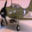

In [9]:
image, label = dataset[20]
print(label)
image

In [10]:
# Get a dictionary associating target values with folder names
data_dir = train_root
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [11]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(), # convert to pytorch tensor
])

data_dir = train_root
dataset = PlayingImgNetDataset(data_dir, transform)

In [12]:
dataset[100]

(tensor([[[0.6471, 0.6471, 0.6471,  ..., 0.7059, 0.7098, 0.7098],
          [0.6471, 0.6471, 0.6471,  ..., 0.7059, 0.7098, 0.7098],
          [0.6431, 0.6431, 0.6431,  ..., 0.6980, 0.7020, 0.7020],
          ...,
          [0.3765, 0.3765, 0.3765,  ..., 0.4314, 0.4314, 0.4314],
          [0.3765, 0.3765, 0.3765,  ..., 0.4353, 0.4314, 0.4314],
          [0.3765, 0.3765, 0.3765,  ..., 0.4353, 0.4314, 0.4314]],
 
         [[0.6863, 0.6863, 0.6863,  ..., 0.7569, 0.7608, 0.7608],
          [0.6863, 0.6863, 0.6863,  ..., 0.7569, 0.7608, 0.7608],
          [0.6824, 0.6824, 0.6824,  ..., 0.7529, 0.7569, 0.7569],
          ...,
          [0.4902, 0.4902, 0.4902,  ..., 0.5373, 0.5333, 0.5333],
          [0.4902, 0.4902, 0.4902,  ..., 0.5373, 0.5333, 0.5333],
          [0.4902, 0.4902, 0.4902,  ..., 0.5373, 0.5333, 0.5333]],
 
         [[0.7843, 0.7843, 0.7882,  ..., 0.8667, 0.8745, 0.8745],
          [0.7843, 0.7843, 0.7882,  ..., 0.8667, 0.8745, 0.8745],
          [0.7804, 0.7804, 0.7843,  ...,

In [13]:
image, label = dataset[100]
image.shape # 3D size of the tensor

torch.Size([3, 128, 128])

Dataloaders
- Batching the dataset automatically

In [14]:
dataloader = DataLoader(dataset, batch_size = 32, shuffle = True)

In [15]:
for images, labels in dataloader:
  break

In [16]:
images.shape, labels.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [17]:
labels

tensor([1, 5, 1, 2, 2, 5, 3, 3, 3, 9, 7, 4, 8, 7, 8, 6, 7, 6, 8, 0, 8, 2, 5, 3,
        8, 5, 9, 1, 8, 0, 0, 5])

## Pytorch model

In [18]:
class SimpleImgNetClassifer(nn.Module):
  def __init__(self, num_classes = 10):
    super(SimpleImgNetClassifer, self).__init__()
    # define all the parts of the models
    self.base_model = timm.create_model('efficientnet_b0', pretrained=True)
    self.features = nn.Sequential(*list(self.base_model.children())[:-1])
    enet_out_size = 1280
    self.classifier = nn.Linear(enet_out_size, num_classes)

  def forward(self, x):
    # connect these parts and return the output
    x = self.features(x)
    output = self.classifier(x)
    return output

In [19]:
model = SimpleImgNetClassifer(num_classes=10)
print(str(model)[:500])

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

SimpleImgNetClassifer(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=F


In [20]:
example_out = model(images)
example_out.shape # batch size, num_classes

torch.Size([32, 10])

## Training loop

- optimizer
- loss function

In [21]:
# loss function
criterion = nn.CrossEntropyLoss()
# Optimizer
optimizer = optim.Adam(model.parameters(), lr = 0.001)

In [22]:
criterion(example_out, labels)

tensor(2.3414, grad_fn=<NllLossBackward0>)

## Setup datasets



In [24]:
from PIL import Image

In [25]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_folder = train_root
valid_folder = val_root
test_folder = test_root

train_dataset = PlayingImgNetDataset(train_folder, transform = transform)
val_dataset = PlayingImgNetDataset(valid_folder, transform = transform)
test_dataset = PlayingImgNetDataset(test_folder, transform = transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [26]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [31]:
num_epochs = 5
train_losses, val_losses = [], []

model = SimpleImgNetClassifer(num_classes=10)
model.to(device)

for epoch in range(num_epochs):
  # set the model to train
  model.train()
  running_loss = 0.0
  for images, labels in train_loader:
    images, labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item() * images.size(0)
  train_loss = running_loss / len(train_loader.dataset)
  train_losses.append(train_loss)

  # validation phase
  model.eval()
  running_loss = 0.0
  with torch.no_grad():
    for images, labels in val_loader:
      images, labels = images.to(device), labels.to(device)
      outputs = model(images)
      loss = criterion(outputs, labels)
      running_loss += loss.item() * images.size(0)
  val_loss = running_loss / len(val_loader.dataset)
  val_losses.append(val_loss)

  #print epoch stats
  print(f"epoch:{epoch+1}/{num_epochs} - train loss:{train_loss}, val loss:{val_loss}")

epoch:1/5 - train loss:2.330843867916531, val loss:2.3268159172058107
epoch:2/5 - train loss:2.331630517578125, val loss:2.3315513694763186
epoch:3/5 - train loss:2.332024242231581, val loss:2.3278771072387694
epoch:4/5 - train loss:2.3307086263868544, val loss:2.332382028961182
epoch:5/5 - train loss:2.331663712310791, val loss:2.33602134475708


## visualize the data

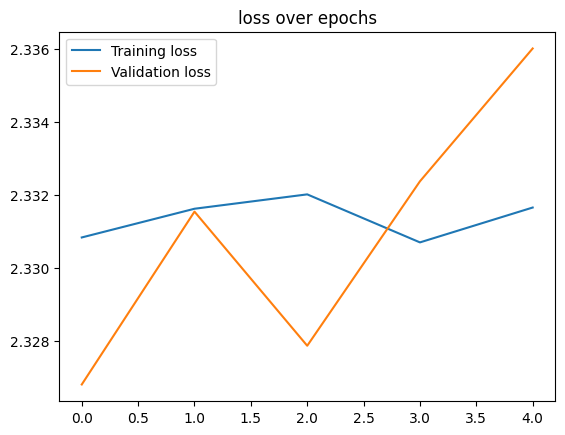

In [32]:
plt.plot(train_losses, label = 'Training loss')
plt.plot(val_losses, label = 'Validation loss')
plt.legend()
plt.title("loss over epochs")
plt.show()

## Evaluate the result

0


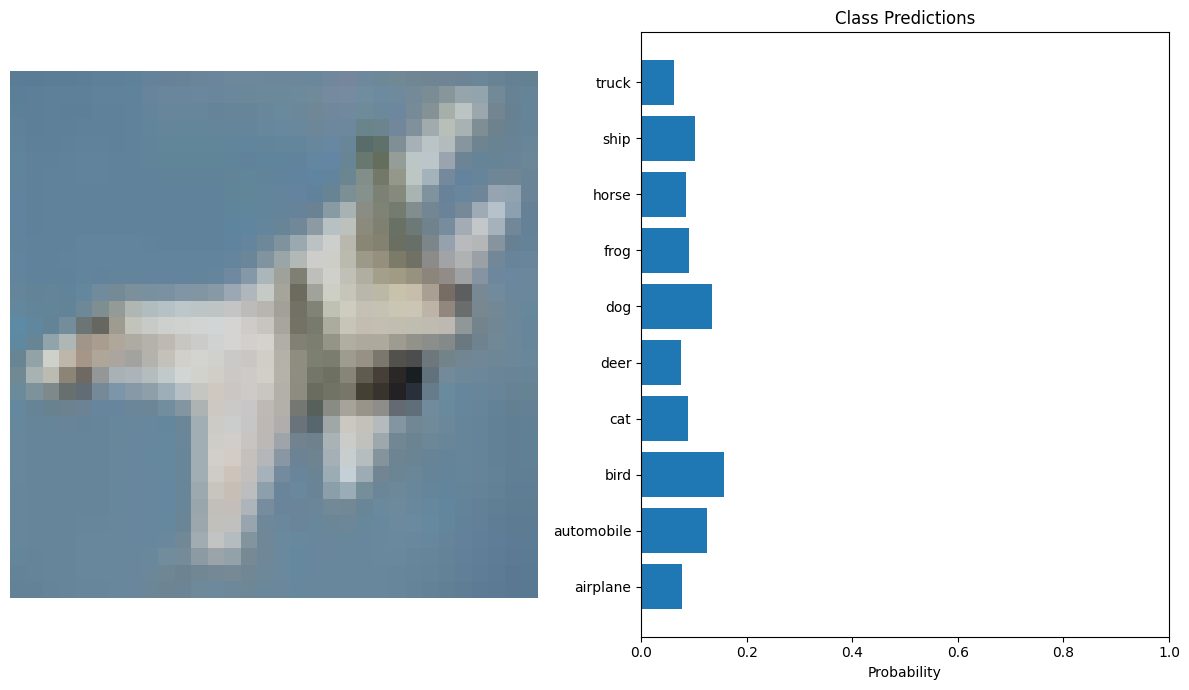

In [45]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the image
def preprocess_image(image_path, transform):
  image = Image.open(image_path).convert("RGB")
  return image, transform(image).unsqueeze(0)

# predict using the model
def predict(model, image_tensor, device):
  model.eval()
  with torch.no_grad():
    image_tensor = image_tensor.to(device)
    outputs = model(image_tensor)
    probabilities = torch.nn.functional.softmax(outputs, dim=1)
  return probabilities.cpu().numpy().flatten()

# visualization
def visualize_predictions(original_image, probabilities, class_names):
  fig, axarr = plt.subplots(1, 2, figsize=(12, 7))

  # Display image
  axarr[0].imshow(original_image)
  axarr[0].axis("off")

  # Display prediction
  axarr[1].barh(class_names, probabilities)
  axarr[1].set_xlabel("Probability")
  axarr[1].set_title("Class Predictions")
  axarr[1].set_xlim(0, 1)

  plt.tight_layout()
  plt.show()

# Example usage
img, label = test_dataset[0]
test_image = test_dataset.data.imgs[0][0]
print(label)
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

original_image, image_tensor = preprocess_image(test_image, transform)
probabilities = predict(model, image_tensor, device)

# Assuming dataset.classes gives the class names
class_names = dataset.classes
visualize_predictions(original_image, probabilities, class_names)

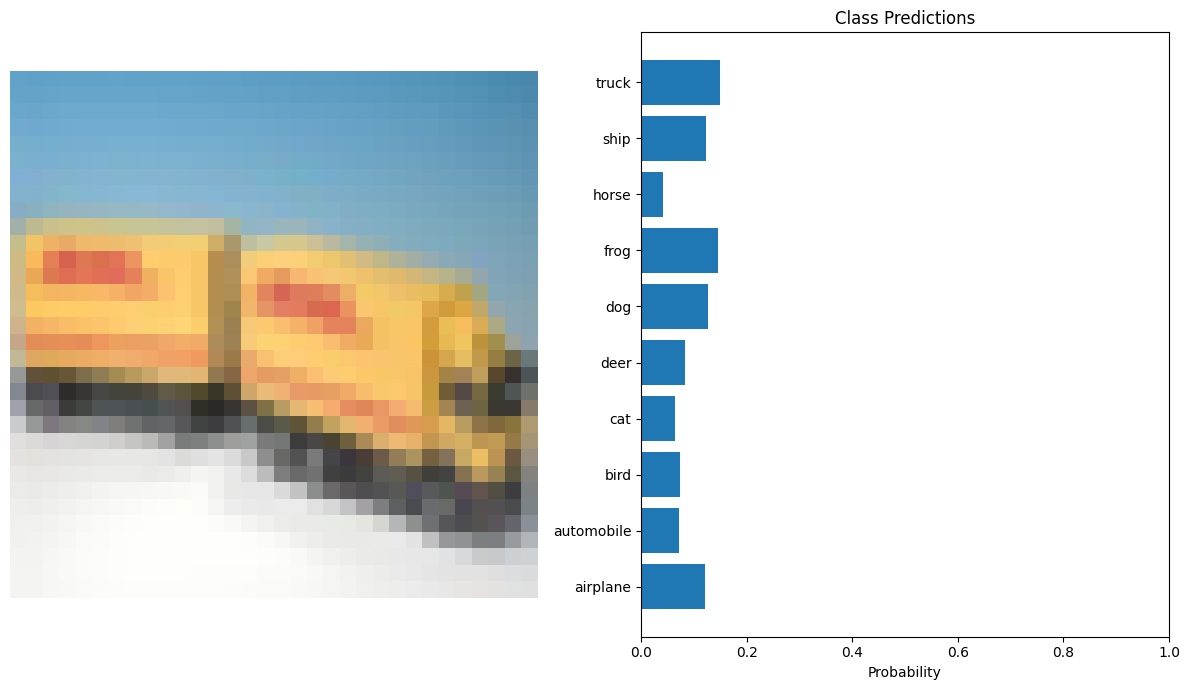

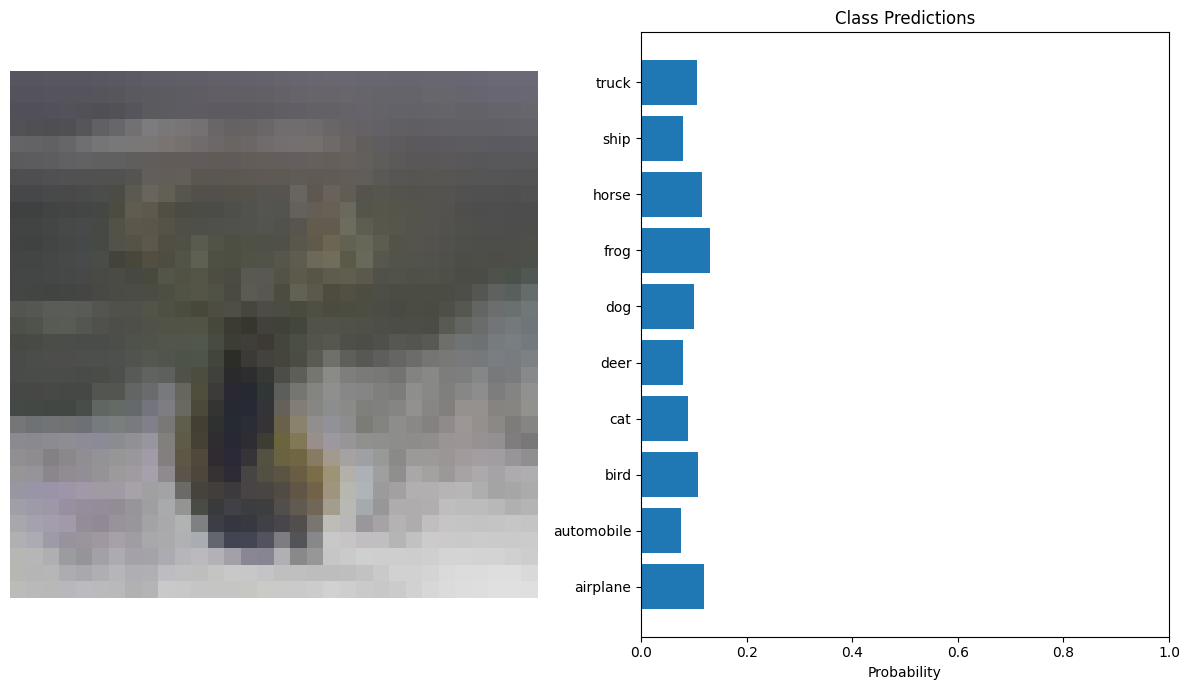

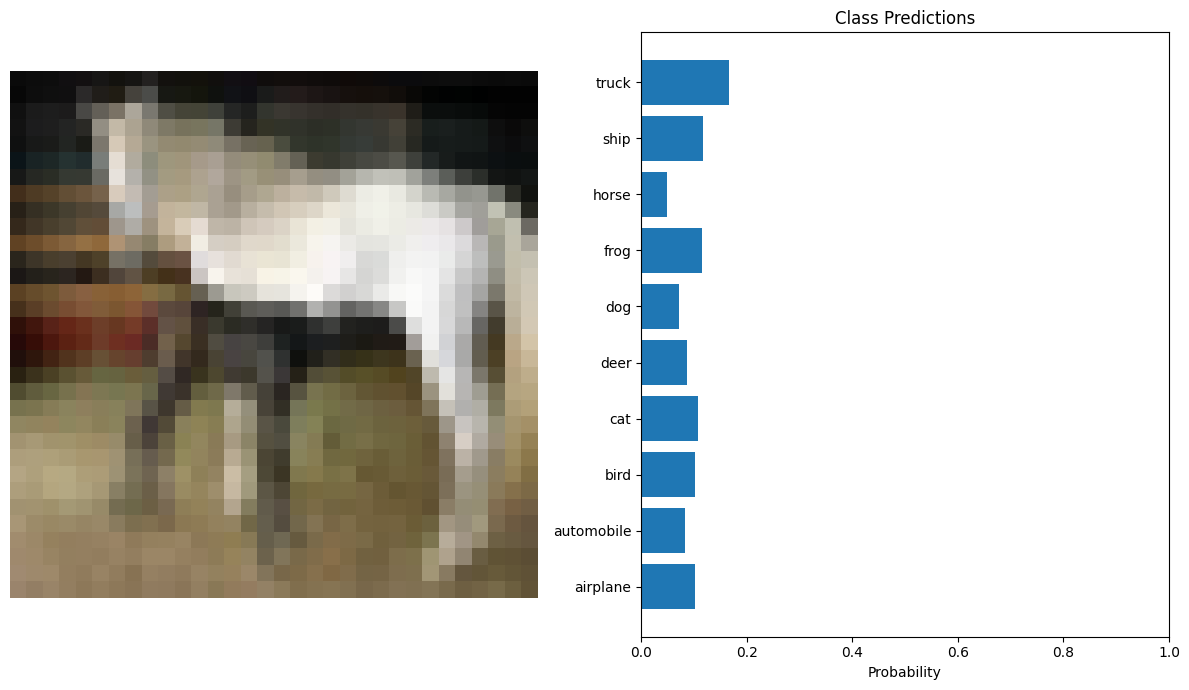

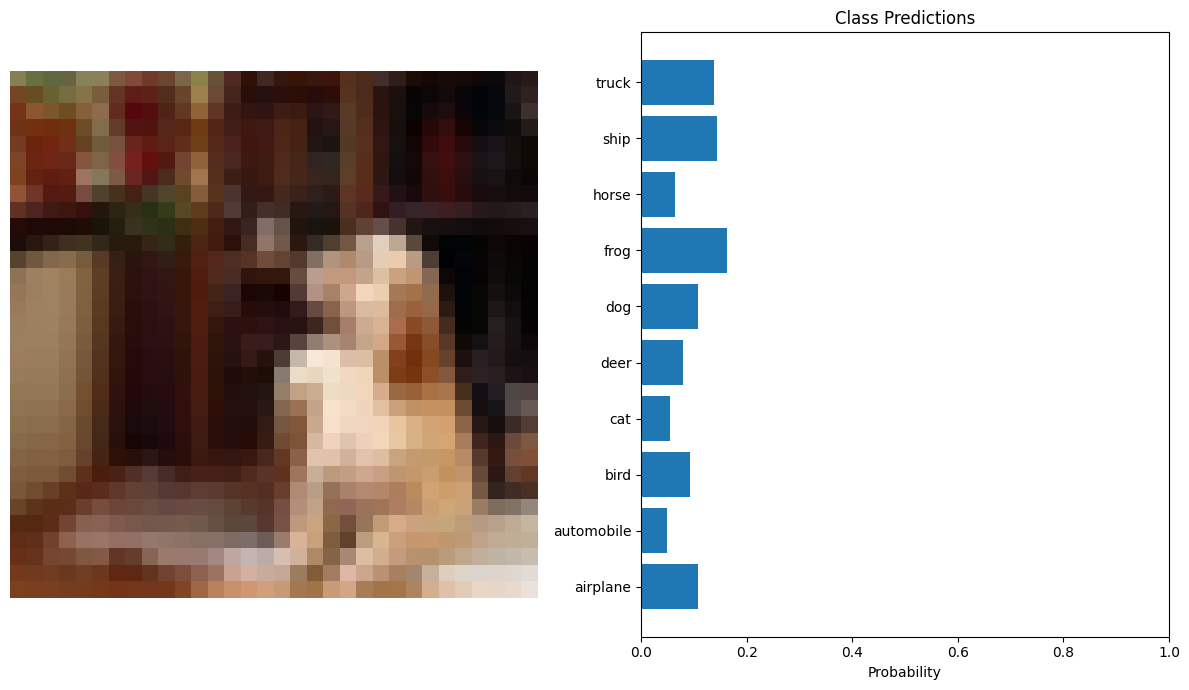

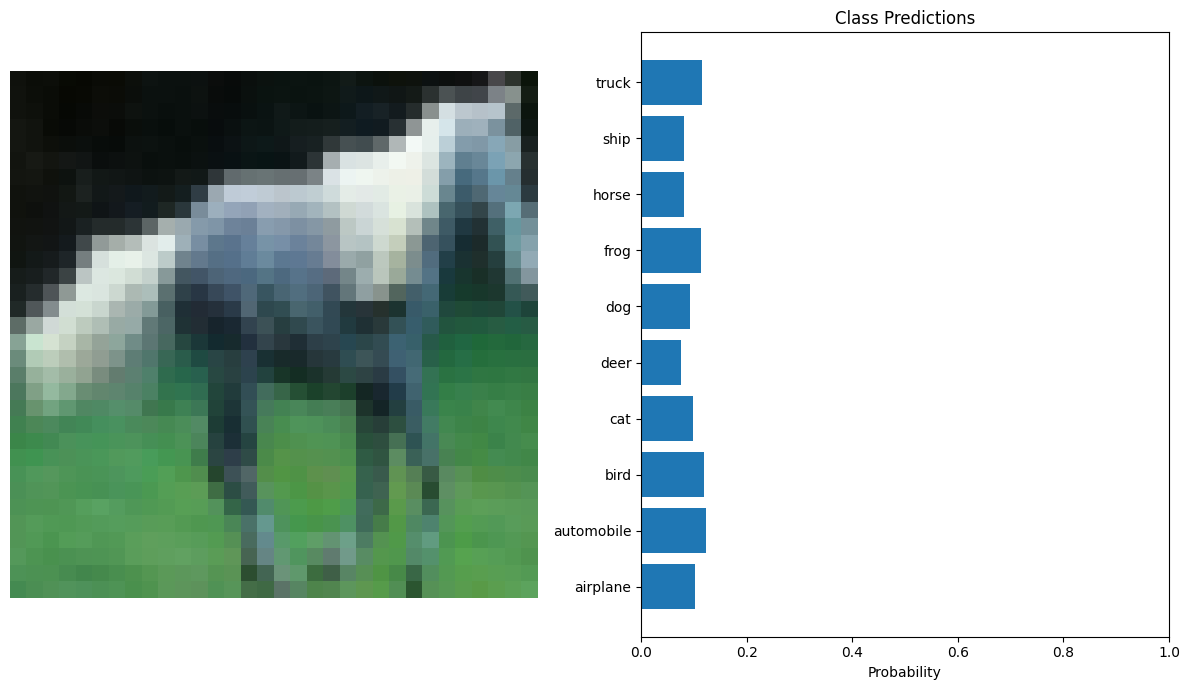

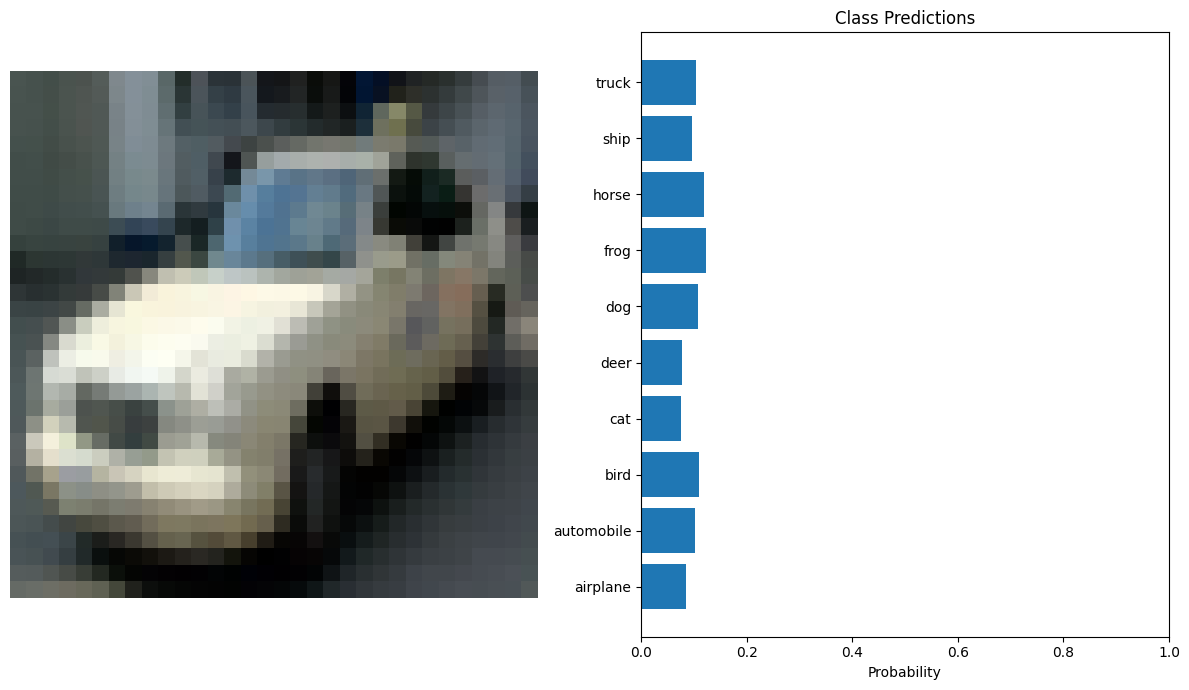

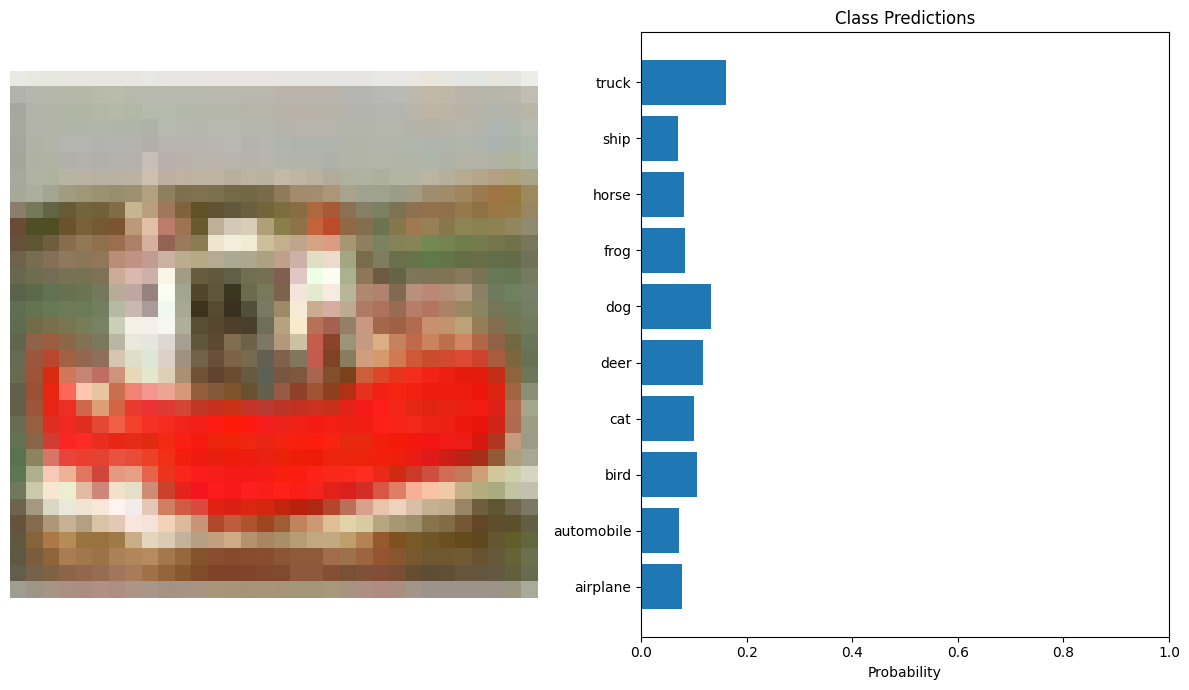

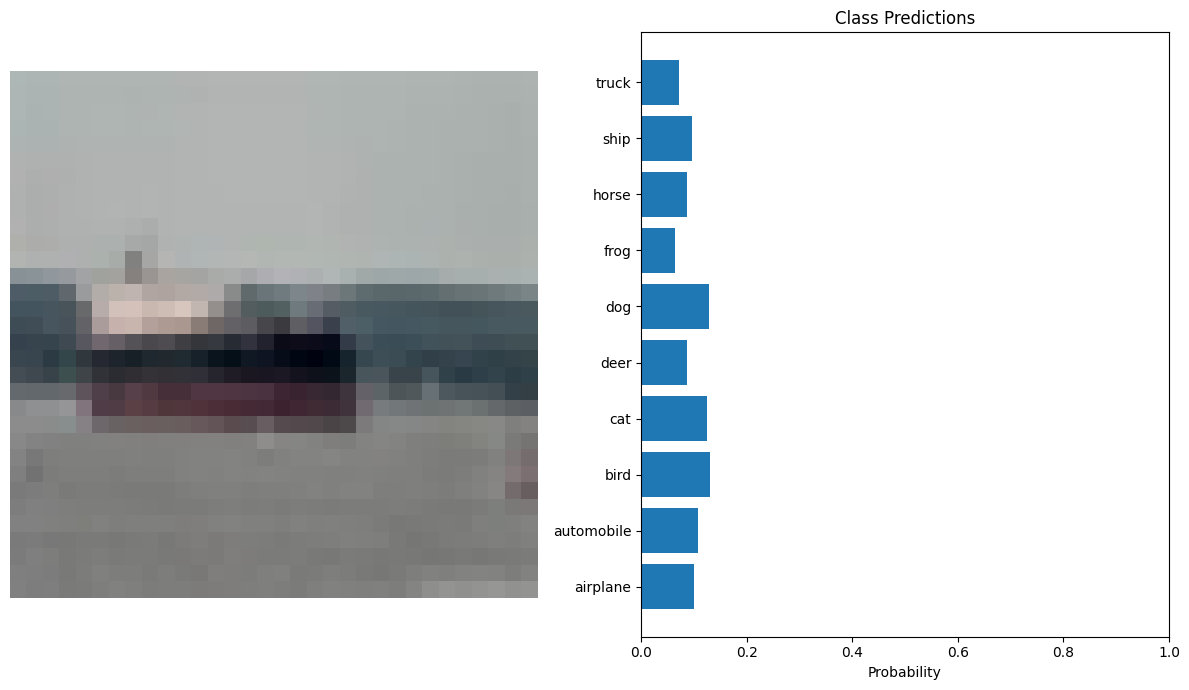

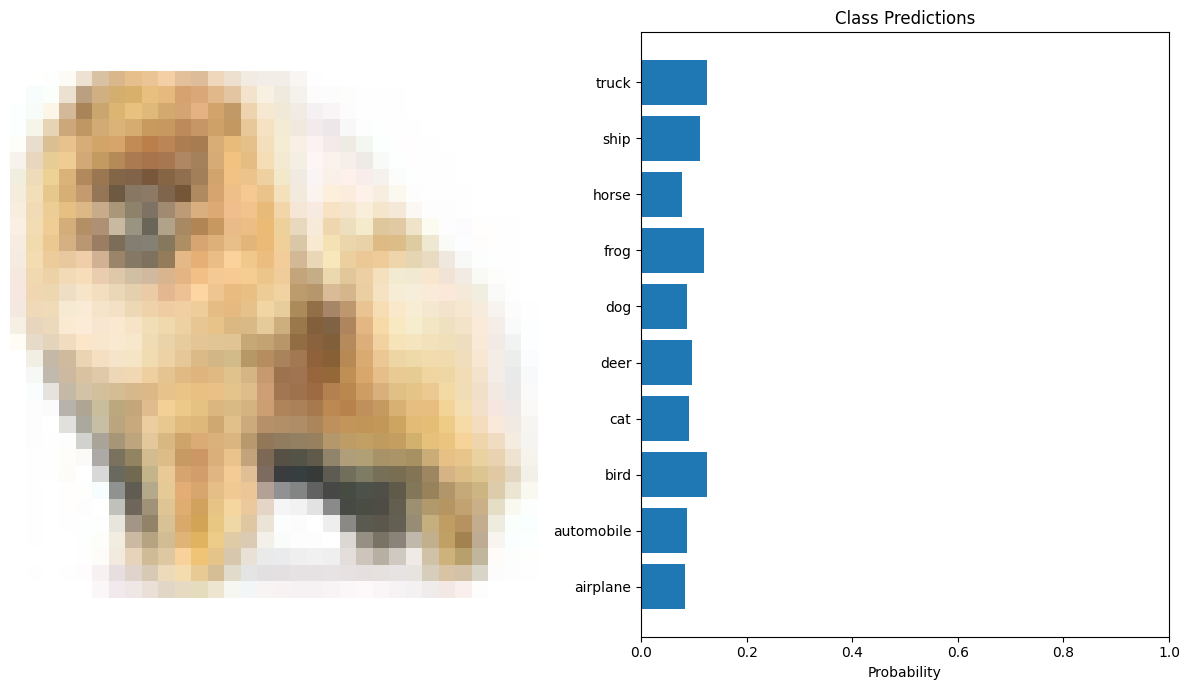

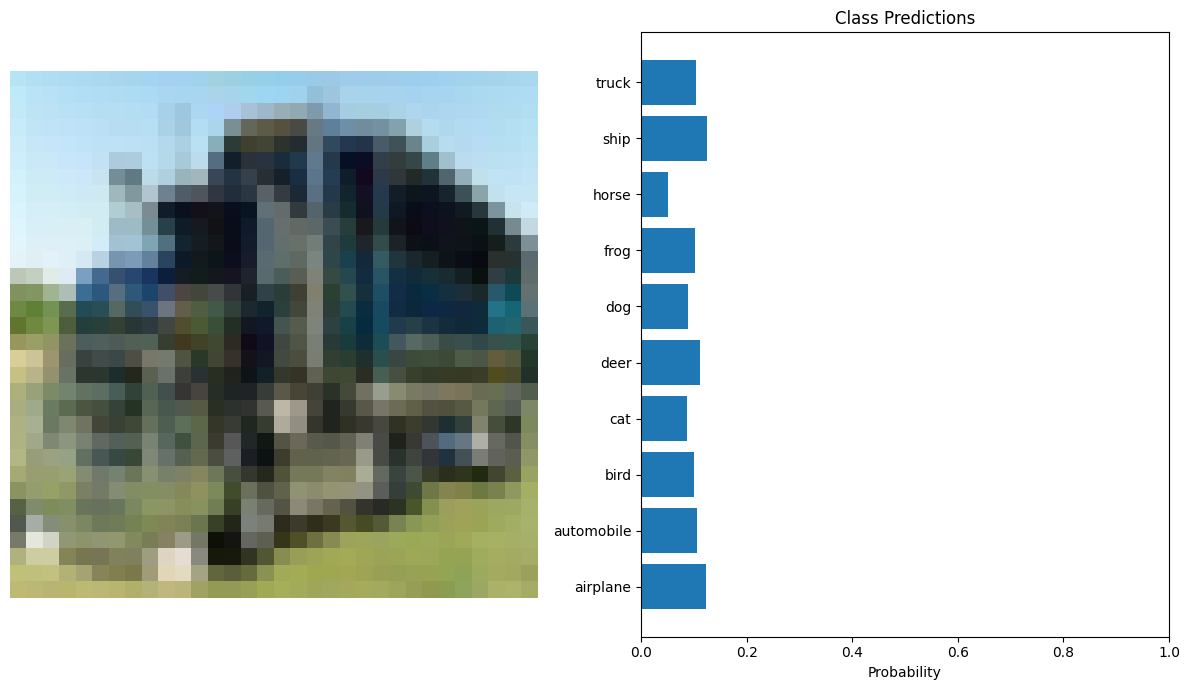

In [46]:
from glob import glob
test_images = glob(os.path.join(test_root, "*", "*"))
test_examples = np.random.choice(test_images, 10)

for example in test_examples:
  original_image, image_tensor = preprocess_image(example, transform)
  probabilities = predict(model, image_tensor, device)

  # Assuming dataset.classes gives the class names
  class_names = dataset.classes
  visualize_predictions(original_image, probabilities, class_names)



In [ ]:
# calculate the accuracy of the test dataset